<a href="https://colab.research.google.com/github/Foco22/COVID-19_Death_Rate_Chile/blob/master/Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


CASOS CONFIRMADOS MINSAL COVIH-19

In [67]:
deaths_cases_file_link = 'https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto16/CasosGeneroEtario_std.csv'
dfconfirmados = pd.read_csv(deaths_cases_file_link)

dfconfirmados.head()

dfconfirmados['Fecha'] = pd.to_datetime(dfconfirmados['Fecha'])

dfconfirmados.head()


,Grupo de edad,Sexo,Fecha,Casos confirmados
0,00 - 04 años,M,2020-03-25,4
1,05 - 09 años,M,2020-03-25,2
2,10 - 14 años,M,2020-03-25,7
3,15 - 19 años,M,2020-03-25,8
4,20 - 24 años,M,2020-03-25,25


In [68]:
dfconfirmados = dfconfirmados.loc[dfconfirmados['Fecha']== '2020-06-23']
dfconfirmados.head()

data_dic = {'00 - 04 años': '0-9',
            '05 - 09 años': '0-9',
            '10 - 14 años': '10-19',
            '15 - 19 años': '10-19',
            '20 - 24 años': '20-29',
            '25 - 29 años': '20-29',
            '30 - 34 años': '30-39',
            '35 - 39 años': '30-39',
            '40 - 44 años': '40-49',
            '45 - 49 años': '40-49',
            '50 - 54 años': '50-59',
            '55 - 59 años': '50-59',
            '60 - 64 años': '60-64',
            '65 - 69 años': '64-69',
            '70 - 74 años': '70-74',
            '75 - 79 años': '74-79',
            '80 y más años': '80-120',
            }
            
dfconfirmados['Grupo de edad'] = dfconfirmados['Grupo de edad'].apply(lambda x : data_dic[x])

In [69]:
dfconfirmados.head()

,Grupo de edad,Sexo,Fecha,Casos confirmados
1768,0-9,M,2020-06-23,2302
1769,0-9,M,2020-06-23,1772
1770,10-19,M,2020-06-23,2054
1771,10-19,M,2020-06-23,3640
1772,20-29,M,2020-06-23,10344


Muertes por Sexo desde MINSAL

In [12]:
from google.colab import files
uploaded = files.upload()

Saving muertes2.csv to muertes2.csv


In [46]:
import io
dfmuertes = pd.read_csv(io.BytesIO(uploaded['muertes2.csv']), encoding = "ISO-8859-1", delimiter=';')
# Dataset is now stored in a Pandas Dataframe

dfmuertes.head()

,Año,Periodo,Sexo,Edad,Codigo 1,Comuna,Region,Codigo 2,Enfermdad,Codigo 3,Causa
0,2020,01-01-2020,Hombre,90 a 99,5801,Quilpué,De Valparaíso,I60-I69,Enfermedades cerebrovasculares,I00-I99,Enfermedades del sistema circulatorio
1,2020,13-06-2020,Hombre,85 a 89,13101,Santiago,Metropolitana de Santiago,U07.1,COVID-19 Confirmado,U07,COVID-19
2,2020,24-05-2020,Mujer,100 +,5801,Quilpué,De Valparaíso,J09-J18,Influenza [gripe] y neumonía,J00-J99,Enfermedades del sistema respiratorio
3,2020,02-06-2020,Mujer,85 a 89,10107,Llanquihue,De Los Lagos,U07.2,COVID-19 Sospechoso,U07,COVID-19
4,2020,08-04-2020,Mujer,85 a 89,13101,Santiago,Metropolitana de Santiago,G90-G99,Otros trastornos del sistema nervioso,G00-G99,Enfermedades del sistema nervioso central


In [47]:
dfmuertes = dfmuertes.loc[dfmuertes['Causa'] == 'COVID-19']

dfmuertes = dfmuertes.loc[(dfmuertes['Periodo'] != '25-06-2020') & (dfmuertes['Periodo'] != '24-06-2020')]

In [48]:
dfmuertes.describe()

,Año,Codigo 1
count,8757.0,8757.000000
mean,2020.0,11755.751056
std,0.0,3326.122247
min,2020.0,1101.000000
25%,2020.0,13103.000000
50%,2020.0,13114.000000
75%,2020.0,13127.000000
max,2020.0,99999.000000


In [49]:
sns.set()
dfmuertes['Sexo'].value_counts()

Hombre    4986
Mujer     3771
Name: Sexo, dtype: int64

In [50]:
data_dic_sexo = {'Hombre': 'M',
            'Mujer': 'F',
            'Indeterminado': 'M'}
dfmuertes['Sexo'] = dfmuertes['Sexo'].apply(lambda x : data_dic_sexo[x])

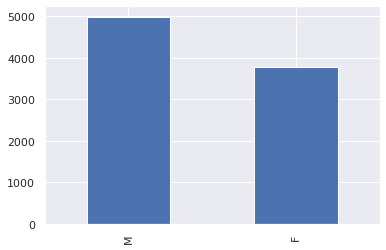

In [53]:
sns.set()

dfmuertes['Sexo'].value_counts().plot.bar()

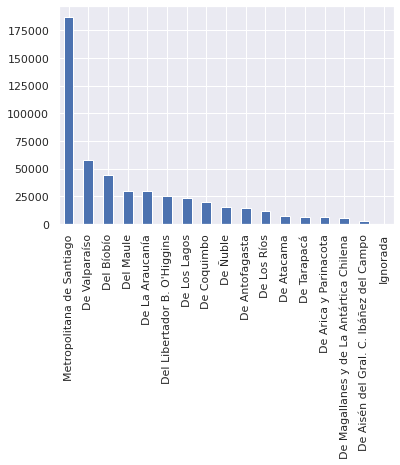

In [24]:
sns.set()
dfmuertes['Region'].value_counts().plot.bar()


In [54]:
data_dic_muertes = {'< 1': '0-9',
            '1 a 4': '0-9',
            '5 a 9': '0-9',
            '10 a 14': '10-19',
            '15 a 19': '10-19',
            '20 a 24': '20-29',
            '25 a 29': '20-29',
            '30 a 34': '30-39',
            '35 a 39': '30-39',
            '40 a 44': '40-49',
            '45 a 49': '40-59',
            '50 a 54': '50-59',
            '55 a 59': '50-59',
            '60 a 64': '60-69',
            '65 a 69': '60-69',
            '70 a 74': '70-74',
            '75 a 79': '75-79',
            '80 a 84': '80-120',
            '85 a 89': '80-120',
            '90 a 99': '80-120',
            '100 +'  :  '80-120'
            }
            
dfmuertes['Edad'] = dfmuertes['Edad'].apply(lambda x : data_dic_muertes[x])

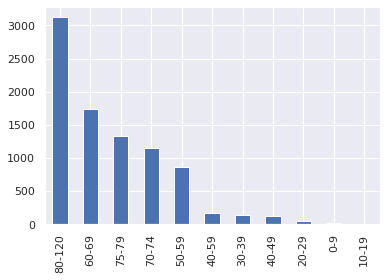

In [58]:
dfedad = dfmuertes.sort_values('Edad', ascending = False)
dfedad['Edad'].value_counts().plot.bar()

In [65]:
dmuertes = dfmuertes[['Sexo','Edad']]
dmuertes['Persona'] = 1
dmuertes = dmuertes.groupby(['Sexo','Edad']).sum()
dmuertes = dmuertes.reset_index()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [70]:
dfconfirmados = dfconfirmados[['Sexo','Grupo de edad','Casos confirmados']]
dfconfirmados = dfconfirmados.rename(columns={'Grupo de edad': 'Edad'})

In [71]:
dmuertes = dmuertes.rename(columns={'Persona': 'Muerte'})

In [72]:
dmuertes

,Sexo,Edad,Muerte
0,F,0-9,15
1,F,10-19,4
2,F,20-29,20
3,F,30-39,53
4,F,40-49,51
5,F,40-59,55
6,F,50-59,284
7,F,60-69,635
8,F,70-74,456
9,F,75-79,549


In [73]:
dfconfirmados= dfconfirmados.groupby(['Sexo','Edad']).sum()
dfconfirmados = dfconfirmados.reset_index()

In [76]:
result = pd.merge(dfconfirmados, dmuertes, on=['Sexo','Edad'])
result['Ratio Muertos'] = round(result['Muerte']/result['Casos confirmados']*100,2)
result.head()

,Sexo,Edad,Casos confirmados,Muerte,Ratio Muertos
0,F,0-9,3752,15,0.40
1,F,10-19,6177,4,0.06
2,F,20-29,26365,20,0.08
3,F,30-39,27184,53,0.19
4,F,40-49,20742,51,0.25


In [77]:
r_muerte = round(result['Muerte'].sum()/result['Casos confirmados'].sum()*100,2)
print('La probabilidad de muertes de COVID-19 es {} % '.format(r_muerte))

La probabilidad de muertes de COVID-19 es 2.41 % 


In [79]:
result.pivot(index='Edad', columns='Sexo', values='Ratio Muertos')

Sexo,F,M
Edad,,
0-9,0.40,0.17
10-19,0.06,0.12
20-29,0.08,0.14
30-39,0.19,0.30
40-49,0.25,0.34
50-59,1.50,2.74
70-74,14.70,21.60
80-120,39.35,56.37


Text(0.5, 1.0, 'Muerto por COVIH-19 en Chile')

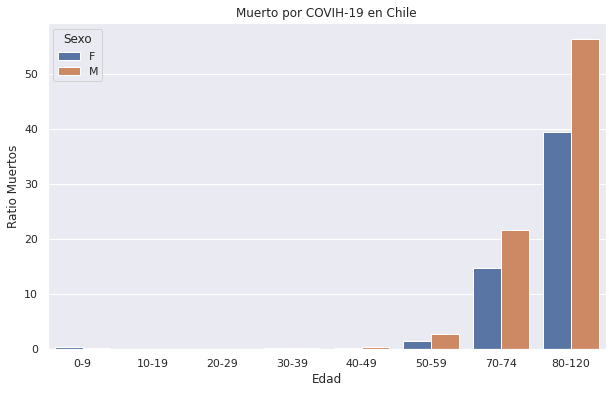

In [78]:
figure = plt.figure(figsize=(10,6))
sns.barplot(x ='Edad', y='Ratio Muertos', hue ='Sexo', data = result )
plt.title('Muerto por COVIH-19 en Chile')